In [588]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

In [593]:
path = r'C:\Users\AmineKassimi\Documents\Data_Mining_TPs\latestdata.csv'
dataset = pd.read_csv(path)

In [595]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

<AxesSubplot:>

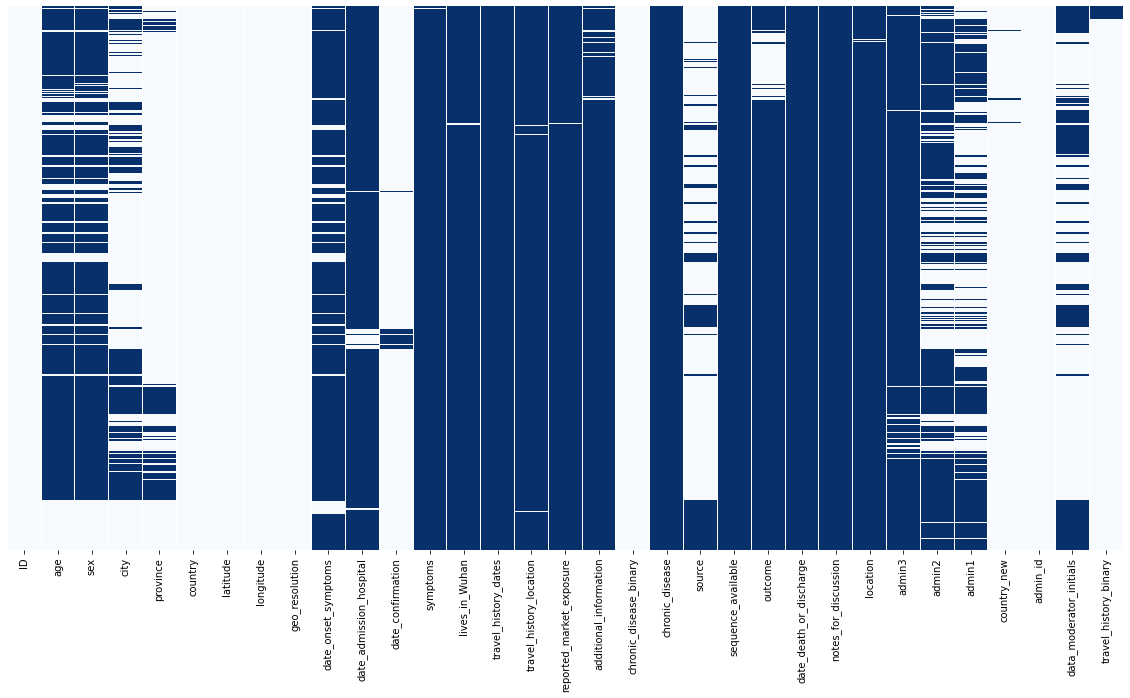

In [596]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isnull(), yticklabels =False, cbar = False, cmap="Blues")

In [597]:
dataf =dataset[dataset['outcome'].isnull() != True]

<AxesSubplot:>

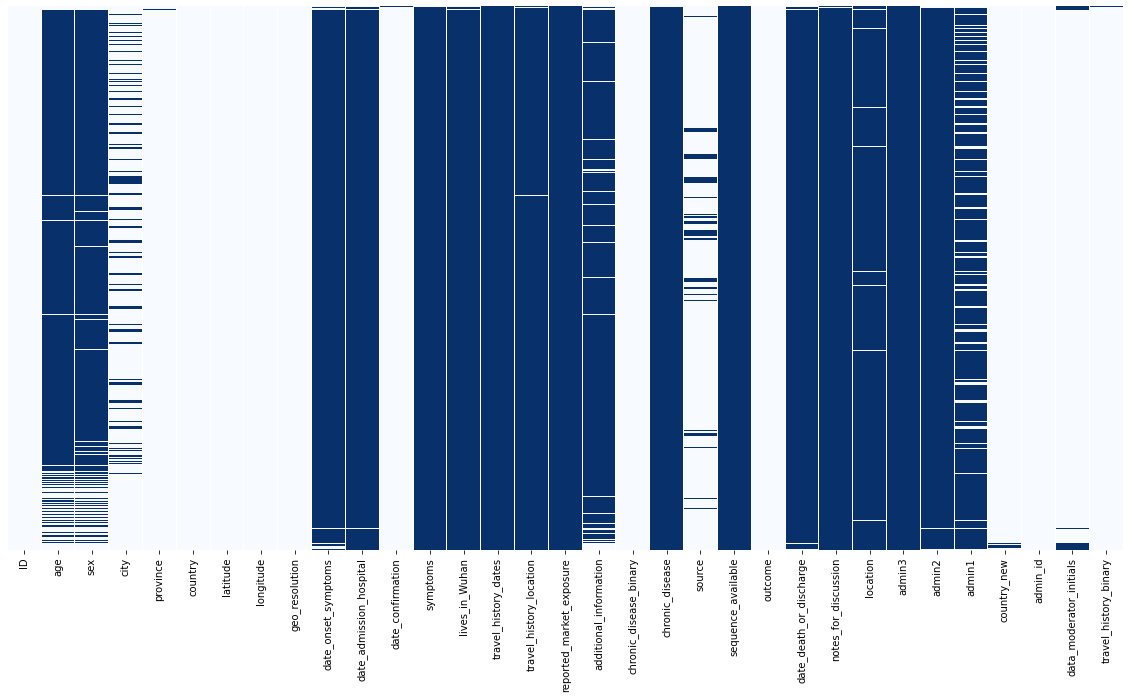

In [598]:
plt.figure(figsize=(20,10))
sns.heatmap(dataf.isnull(), yticklabels =False, cbar = False, cmap="Blues")

In [599]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307382 entries, 0 to 673607
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        307382 non-null  object 
 1   age                       34435 non-null   object 
 2   sex                       38115 non-null   object 
 3   city                      263094 non-null  object 
 4   province                  306481 non-null  object 
 5   country                   307380 non-null  object 
 6   latitude                  307382 non-null  float64
 7   longitude                 307382 non-null  float64
 8   geo_resolution            307382 non-null  object 
 9   date_onset_symptoms       3543 non-null    object 
 10  date_admission_hospital   301 non-null     object 
 11  date_confirmation         307308 non-null  object 
 12  symptoms                  476 non-null     object 
 13  lives_in_Wuhan            174 non-null     o

In [600]:
dataf.drop(['ID','country_new','province','date_onset_symptoms', 'date_admission_hospital','source','date_confirmation','date_onset_symptoms',              
              'symptoms', 'lives_in_Wuhan','travel_history_dates','travel_history_location',
             'reported_market_exposure','additional_information', 'chronic_disease', 'sequence_available',
         'date_death_or_discharge','notes_for_discussion', 'location', 'admin3', 'admin1','admin2','admin_id'],axis=1,inplace=True)

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [601]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307382 entries, 0 to 673607
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      34435 non-null   object 
 1   sex                      38115 non-null   object 
 2   city                     263094 non-null  object 
 3   country                  307380 non-null  object 
 4   latitude                 307382 non-null  float64
 5   longitude                307382 non-null  float64
 6   geo_resolution           307382 non-null  object 
 7   chronic_disease_binary   307382 non-null  bool   
 8   outcome                  307382 non-null  object 
 9   data_moderator_initials  301137 non-null  object 
 10  travel_history_binary    307057 non-null  object 
dtypes: bool(1), float64(2), object(8)
memory usage: 26.1+ MB


<AxesSubplot:>

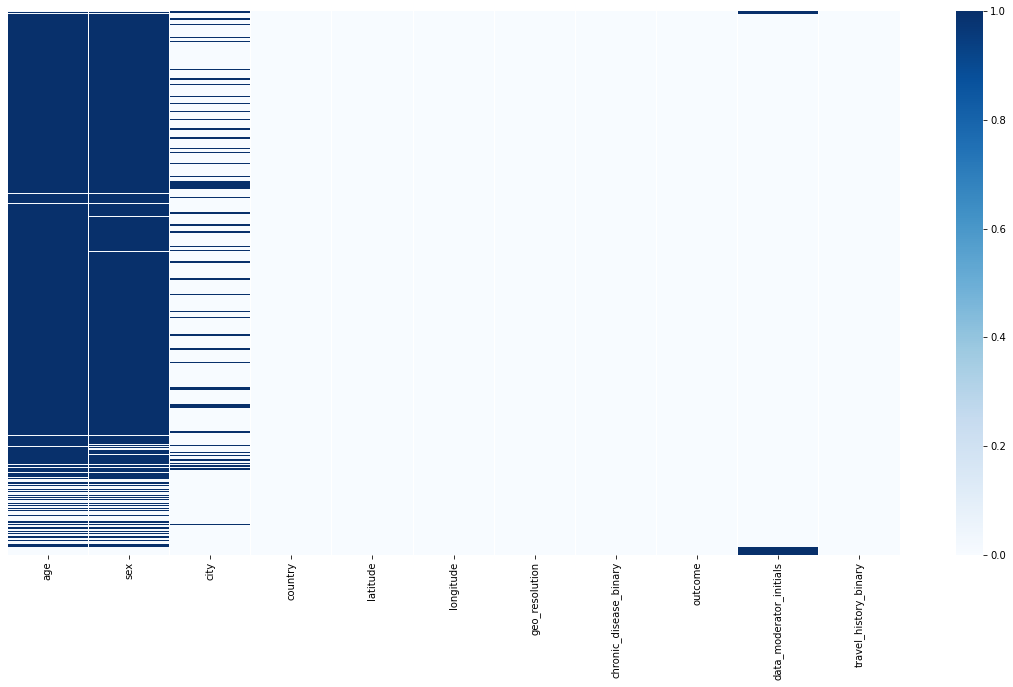

In [602]:
plt.figure(figsize=(20,10))
sns.heatmap(dataf.isnull(), yticklabels =False, cbar = True, cmap="Blues")

# * la colonne 'outcome'

In [603]:
dead = ['Dead','severe illness', 'Death','unstable','Deceased', 'Died', 'dead', 'death', 'died',
        'critical condition, intubated as of 14.02.2020', 'severe','Migrated', 'Migrated_Other',
        'Critical condition', 'critical condition']
 
discharged = ['Alive', 'Discharged', 'Discharged from hospital', 'Recovered', 'Stable', 'Receiving Treatment',
              'Symptoms only improved with cough. Currently hospitalized for follow-up.',
              'discharge', 'discharged', 'not hospitalized', 'recovered', 'recovering at home 03.03.2020', 
              'released from quarantine', 'stable', 'stable condition', 'Under treatment',
              'https://www.mspbs.gov.py/covid-19.php','Hospitalized','treated in an intensive care unit (14.02.2020)']

for d in dead:
    dataf['outcome'] = dataf['outcome'].replace([d],0)

for di in discharged:
    dataf['outcome'] = dataf['outcome'].replace([di],1)

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [604]:
np.unique(dataf['outcome'],return_counts=True)

(array([0, 1], dtype=int64), array([  6020, 301362], dtype=int64))

In [605]:
dataf['city']=dataf['city'].astype(str)

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# *** la colonne country

In [606]:
np.unique(dataf['country'].astype(str),return_counts=True)

(array(['Algeria', 'Angola', 'Australia', 'Bahamas', 'Brazil',
        'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Canada',
        'Central African Republic', 'China', 'Cuba', 'Djibouti', 'Egypt',
        'Eritrea', 'Eswatini', 'Ethiopia', 'France', 'Gabon', 'Gambia',
        'Germany', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'India',
        'Iran', 'Italy', 'Japan', 'Kenya', 'Malaysia', 'Mozambique',
        'Nepal', 'Niger', 'Nigeria', 'Paraguay', 'Philippines', 'Romania',
        'San Marino', 'Singapore', 'South Korea', 'Spain', 'Sudan',
        'Switzerland', 'Tanzania', 'Thailand', 'Togo',
        'United Arab Emirates', 'United States', 'Vietnam', 'Zambia',
        'Zimbabwe', 'nan'], dtype=object),
 array([     9,      4,     24,      1,      4,      3,      4,     78,
             6,      1,    257,      1,      3,      4,      6,      9,
           122,      7,      6,      6,      3,    378,      8,      2,
             2, 301133,      4,      7,     18,     15,      

In [607]:
#Supprimer les 'NaN'
dataf.dropna(subset = ["country"], inplace=True)
names=np.unique(dataf['country'].astype(str))
names

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Algeria', 'Angola', 'Australia', 'Bahamas', 'Brazil',
       'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Canada',
       'Central African Republic', 'China', 'Cuba', 'Djibouti', 'Egypt',
       'Eritrea', 'Eswatini', 'Ethiopia', 'France', 'Gabon', 'Gambia',
       'Germany', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'India',
       'Iran', 'Italy', 'Japan', 'Kenya', 'Malaysia', 'Mozambique',
       'Nepal', 'Niger', 'Nigeria', 'Paraguay', 'Philippines', 'Romania',
       'San Marino', 'Singapore', 'South Korea', 'Spain', 'Sudan',
       'Switzerland', 'Tanzania', 'Thailand', 'Togo',
       'United Arab Emirates', 'United States', 'Vietnam', 'Zambia',
       'Zimbabwe'], dtype=object)

# *** la colonne City

In [608]:
#Supprimer les pays ayant toutes les villes NaN
countries=[]

for co in names:
    country=dataf[dataf['country']==co]
    name,counts=np.unique(country['city'],return_counts=True)
   
    if name[0]=='nan':
         print(name,counts,co) 
         countries.append(co)

['nan'] [1] Bahamas
['nan'] [3] Djibouti
['nan'] [4] Egypt
['nan'] [9] Eswatini
['nan'] [2] Guinea-Bissau
['nan'] [257] Nigeria
['nan'] [1] San Marino
['nan'] [3] Switzerland
['nan'] [2] United Arab Emirates


In [609]:
for c in countries:
    dataf= dataf.drop(dataf[dataf['country']==c].index, axis=0)

In [610]:
names=np.unique(dataf['country'].astype(str))
names

array(['Algeria', 'Angola', 'Australia', 'Brazil', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Canada', 'Central African Republic',
       'China', 'Cuba', 'Eritrea', 'Ethiopia', 'France', 'Gabon',
       'Gambia', 'Germany', 'Ghana', 'Guinea', 'Guyana', 'India', 'Iran',
       'Italy', 'Japan', 'Kenya', 'Malaysia', 'Mozambique', 'Nepal',
       'Niger', 'Paraguay', 'Philippines', 'Romania', 'Singapore',
       'South Korea', 'Spain', 'Sudan', 'Tanzania', 'Thailand', 'Togo',
       'United States', 'Vietnam', 'Zambia', 'Zimbabwe'], dtype=object)

In [611]:
#Afficher les villes et le nombre d'occurences pour chaque ville dans un pays spécifique
for co in names:
    country=dataf[dataf['country']==co]
    name,counts=np.unique(country['city'],return_counts=True)
    print(name,counts,co,name[np.argmax(counts)]) 

['Bejaia' 'Blida' 'El Oued' 'Khenchela' 'Mascara' 'Tizi Ouzou'] [1 2 2 1 2 1] Algeria Blida
['Luanda'] [4] Angola Luanda
['Adelaide' 'Biritinya' 'Brisbane' 'Gold Coast' 'Macquarie Park'] [ 6  2  4 10  2] Australia Gold Coast
['Sao Paulo'] [4] Brazil Sao Paulo
['Ouagadougou'] [3] Burkina Faso Ouagadougou
['Boa Vista' 'Praia'] [3 1] Cabo Verde Boa Vista
['Bafoussam' 'Douala' 'Yaounde' 'nan'] [ 1  9 15 53] Cameroon nan
['London' 'Toronto' 'Vancouver'] [2 2 2] Canada London
['Bangui'] [1] Central African Republic Bangui
['Ankang City' 'Anqing City' 'Baoji City' 'Beijing' 'Cangzhou City'
 'Changzhou City' 'Chengguan District, Lanzhou City' 'Daxing District'
 'Dingxi City' 'Fangchenggang City' 'Guiyang City' 'Hanzhong City'
 'Hong Kong' "Huai'an City" 'Huating County, Pingliang City'
 'Huaxi District, Guiyang City' 'Jilin City' 'Lianyungang City'
 'Lixian County, Longnan City' 'Maiji District, Tianshui City'
 'Nanjing City' 'Nantong City' 'Panjin City' 'Quarry Bay' 'Shangluo City'
 'Shek Lei

['Binh Xuyen District' 'Ho Chi Minh City'
 'Hotel Ton Dan Street, Nha Trang' 'Minh Quang commune, Tam Dao District'
 'Nha Trang' 'Quat Luu commune, Binh Xuyen District'
 'Son Loi commune, Binh Xuyen District' 'Thanh Hoa'
 'Thien Ke commune, Binh Xuyen District' 'nan'] [4 2 2 2 4 2 8 2 2 4] Vietnam Son Loi commune, Binh Xuyen District
['Copperbelt, Masaiti Hospital in Ndola' 'Lusaka'] [ 2 20] Zambia Lusaka
['Bulawayo' 'Chegutu' 'Chinhoyi' 'Harare' 'Mhondoro' 'Murehwa'
 'Victoria Falls'] [12  1  1 17  3  1  1] Zimbabwe Harare


In [612]:
#les payes ayant des villes avec le "NaN"=max_des_occurences
countries1=[]

for co in names:
    country=dataf[dataf['country']==co]
    name,counts=np.unique(country['city'],return_counts=True)
   
      
    if name[-1]=='nan':
        if counts[-1]==max(counts):
            sortedc=sorted(counts)
            
            print(name,counts,co,name[np.where(counts == sortedc[-2])]) 
            countries1.append((co,name[np.where(counts == sortedc[-2])][0]))

['Bafoussam' 'Douala' 'Yaounde' 'nan'] [ 1  9 15 53] Cameroon ['Yaounde']
['Accra' 'Kumasi' 'Tamale' 'Tema' 'Wa' 'nan'] [ 13   3  10   1   1 350] Ghana ['Accra']
['Conakry' 'nan'] [1 7] Guinea ['Conakry']
['Narita Airport' 'Shiriuchi' 'nan'] [ 2  2 14] Japan ['Narita Airport' 'Shiriuchi']
['Msambweni' 'nan'] [ 1 14] Kenya ['Msambweni']
['Kuala Lumpur' 'nan'] [2 4] Malaysia ['Kuala Lumpur']
['Maputo' 'nan'] [3 4] Mozambique ['Maputo']
['Asuncion' 'nan'] [30 96] Paraguay ['Asuncion']
['Cheongju' 'Cheongwon' 'Chonnam National University Hospital' 'Chungju'
 'Gangneung' 'Gimpo Airport' 'Nam' 'nan'] [2 4 2 2 6 2 2 6] South Korea ['Gangneung' 'nan']
['Lome' 'nan'] [6 9] Togo ['Lome']


In [613]:
#le pays et sa villes qui va remplacer le "NaN"
countries1

[('Cameroon', 'Yaounde'),
 ('Ghana', 'Accra'),
 ('Guinea', 'Conakry'),
 ('Japan', 'Narita Airport'),
 ('Kenya', 'Msambweni'),
 ('Malaysia', 'Kuala Lumpur'),
 ('Mozambique', 'Maputo'),
 ('Paraguay', 'Asuncion'),
 ('South Korea', 'Gangneung'),
 ('Togo', 'Lome')]

In [614]:
#two conditions in dataf

payss = dataf['country'] == "Cameroon"

citi = dataf['city'] == 'nan'

dataf[payss & citi]

,age,sex,city,country,latitude,longitude,geo_resolution,chronic_disease_binary,outcome,data_moderator_initials,travel_history_binary
68305,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,False
68306,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,False
68307,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,False
68308,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,False
68309,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,False
68310,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,False
68311,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,True
68312,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,True
68313,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,True
68315,NaN,NaN,nan,Cameroon,5.712146,12.74452,admin0,False,1,NaN,False


In [615]:
for p,cityy in countries1:
    
    payss = dataf['country'] == p

    cityyy = dataf['city']=='nan'

    indices=dataf[payss & cityyy].index
    
    dataf.loc[indices,'city'] =cityy

In [616]:
#les payes ayant des villes avec "Nan"  !=  max_occurences
countries2=[]

for co in names:
    country=dataf[dataf['country']==co]
    name,counts=np.unique(country['city'],return_counts=True)
    #print(name,counts,co,max(counts),name[np.argmax(counts)]) 
      
    if name[-1]=='nan':
        
        print(name,counts,"--",co,"--",name[np.argmax(counts)]) 
         
        countries2.append((co,name[np.argmax(counts)]))

['Ankang City' 'Anqing City' 'Baoji City' 'Beijing' 'Cangzhou City'
 'Changzhou City' 'Chengguan District, Lanzhou City' 'Daxing District'
 'Dingxi City' 'Fangchenggang City' 'Guiyang City' 'Hanzhong City'
 'Hong Kong' "Huai'an City" 'Huating County, Pingliang City'
 'Huaxi District, Guiyang City' 'Jilin City' 'Lianyungang City'
 'Lixian County, Longnan City' 'Maiji District, Tianshui City'
 'Nanjing City' 'Nantong City' 'Panjin City' 'Quarry Bay' 'Shangluo City'
 'Shek Lei' 'Suihua City' 'Suzhou City'
 'Tianzhu County, Qiandongnan Prefecture' 'Tongchuan City' 'Tongren City'
 'Wan Chai' 'Weinan City' 'Wenzhou City' 'Wuhan City' 'Wushan County'
 'Wuxi City' "Xi'an City" 'Xigu District, Lanzhou City' 'Xining City'
 'Xishuangbanna Prefecture' 'Xuzhou City' 'Yancheng City' 'Yangzhou City'
 'Yongdeng County, Lanzhou City' "Yuan'an County, Yichang City" 'nan'] [ 2  2  6  6  1 16  2  2  2  2  4  2  2 22  2  2  2  8  4  2  2  4  2  2
  2  2  2  2  2  4  2  2  2  2 41  2 10 28  2 16  4 14  4  4

In [617]:
countries2

[('China', 'Wuhan City'),
 ('Eritrea', 'Asmara International Airport'),
 ('Philippines', 'Quezon'),
 ('Singapore', 'National Centre for Infectious Diseases'),
 ('Vietnam', 'Son Loi commune, Binh Xuyen District')]

In [618]:
for p,cityy in countries2:
    
    payss = dataf['country'] == p

    cityyy = dataf['city']== 'nan'

    indices=dataf[payss & cityyy].index
    
    dataf.loc[indices,'city'] =cityy

In [619]:
#visualisation
for co in names:
    country=dataf[dataf['country']==co]
    name,counts=np.unique(country['city'],return_counts=True)
    print(name,counts,co,max(counts),name[np.argmax(counts)]) 

['Bejaia' 'Blida' 'El Oued' 'Khenchela' 'Mascara' 'Tizi Ouzou'] [1 2 2 1 2 1] Algeria 2 Blida
['Luanda'] [4] Angola 4 Luanda
['Adelaide' 'Biritinya' 'Brisbane' 'Gold Coast' 'Macquarie Park'] [ 6  2  4 10  2] Australia 10 Gold Coast
['Sao Paulo'] [4] Brazil 4 Sao Paulo
['Ouagadougou'] [3] Burkina Faso 3 Ouagadougou
['Boa Vista' 'Praia'] [3 1] Cabo Verde 3 Boa Vista
['Bafoussam' 'Douala' 'Yaounde'] [ 1  9 68] Cameroon 68 Yaounde
['London' 'Toronto' 'Vancouver'] [2 2 2] Canada 2 London
['Bangui'] [1] Central African Republic 1 Bangui
['Ankang City' 'Anqing City' 'Baoji City' 'Beijing' 'Cangzhou City'
 'Changzhou City' 'Chengguan District, Lanzhou City' 'Daxing District'
 'Dingxi City' 'Fangchenggang City' 'Guiyang City' 'Hanzhong City'
 'Hong Kong' "Huai'an City" 'Huating County, Pingliang City'
 'Huaxi District, Guiyang City' 'Jilin City' 'Lianyungang City'
 'Lixian County, Longnan City' 'Maiji District, Tianshui City'
 'Nanjing City' 'Nantong City' 'Panjin City' 'Quarry Bay' 'Shangluo C

['Binh Xuyen District' 'Ho Chi Minh City'
 'Hotel Ton Dan Street, Nha Trang' 'Minh Quang commune, Tam Dao District'
 'Nha Trang' 'Quat Luu commune, Binh Xuyen District'
 'Son Loi commune, Binh Xuyen District' 'Thanh Hoa'
 'Thien Ke commune, Binh Xuyen District'] [ 4  2  2  2  4  2 12  2  2] Vietnam 12 Son Loi commune, Binh Xuyen District
['Copperbelt, Masaiti Hospital in Ndola' 'Lusaka'] [ 2 20] Zambia 20 Lusaka
['Bulawayo' 'Chegutu' 'Chinhoyi' 'Harare' 'Mhondoro' 'Murehwa'
 'Victoria Falls'] [12  1  1 17  3  1  1] Zimbabwe 17 Harare


In [620]:
#traiter le pays India 
payss = dataf['country']=='India'

cityyy = dataf['city']!= 'nan'

y=dataf[payss & cityyy]

name,counts=np.unique(y['city'],return_counts=True)
name[np.argmax(counts)]


'Mumbai'

In [621]:
India_wrong_cities=['nan','-','171','71']
for city_wrong in India_wrong_cities:
    
    payss = dataf['country'] =='India' 

    cityyy = dataf['city']==city_wrong

    indices=dataf[payss & cityyy].index
    
    dataf.loc[indices,'city'] ='Mumbai'

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataf.isnull(), yticklabels =False, cbar = True, cmap="Blues")

# *** la colonne "sex"

In [622]:
np.unique(dataf['sex'].astype(str),return_counts=True)

(array(['female', 'male', 'nan'], dtype=object),
 array([ 13768,  24335, 268995], dtype=int64))

<AxesSubplot:xlabel='sex', ylabel='count'>

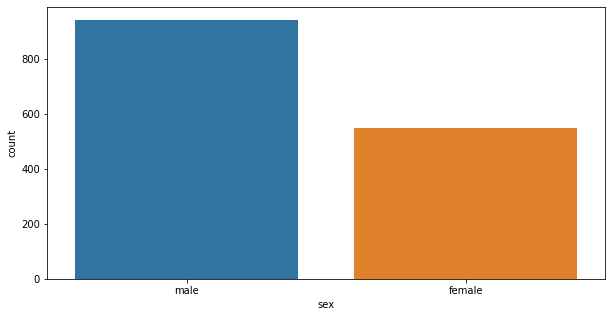

In [623]:
#les personnes avec outcome ="dead"

plt.figure(figsize=[10,5])
plt.subplot(111)
sns.countplot(x = 'sex', data=dataf[dataf['outcome']==0])

<AxesSubplot:xlabel='sex', ylabel='count'>

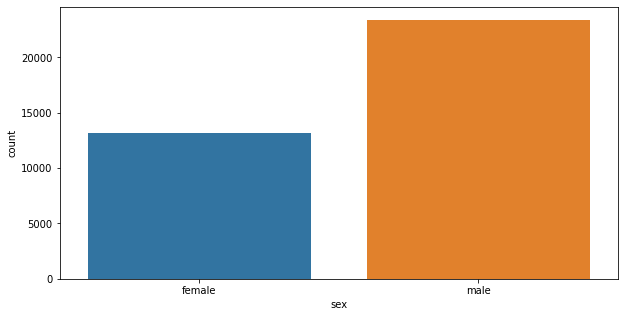

In [624]:
#les personnes avec outcome ="dicharged"
plt.figure(figsize=[10,5])
plt.subplot(111)
sns.countplot(x = 'sex', data=dataf[dataf['outcome']==1])

In [626]:
len(dataf[(dataf['sex'].isnull()==True) & (dataf['outcome']==1) ])

264469

In [627]:
len(dataf[(dataf['sex'].isnull()==True) & (dataf['outcome']==0) ])

4526

In [628]:
sex_to_replace=[(0,'male'),(1,'male')]

for result,sex in sex_to_replace:
    
    outcome = dataf['outcome'] ==result

    s = dataf['sex'].isnull()==True

    indices=dataf[s & outcome].index
    
    dataf.loc[indices,'sex'] =sex

In [629]:
np.unique(dataf['sex'].astype(str),return_counts=True)

(array(['female', 'male'], dtype=object), array([ 13768, 293330], dtype=int64))

<AxesSubplot:>

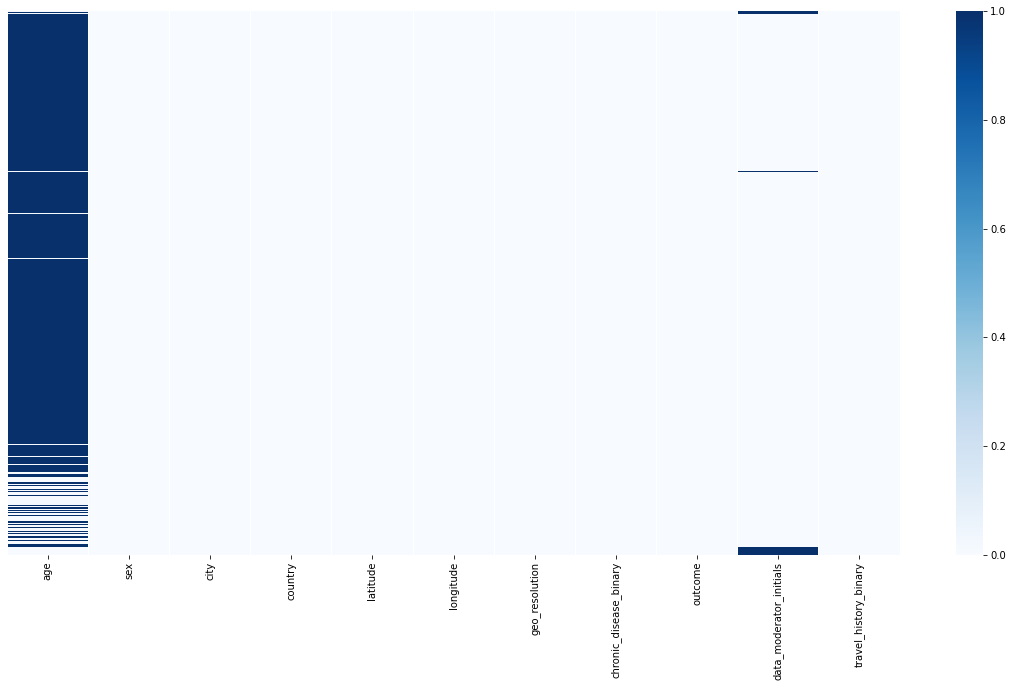

In [630]:
plt.figure(figsize=(20,10))
sns.heatmap(dataf.isnull(), yticklabels =False, cbar = True, cmap="Blues")

# *** la colonne "age"

In [631]:
np.unique(dataf['age'].astype(str),return_counts=True)

(array(['0', '0.1', '0.2', '0.25', '0.3', '0.4', '0.5', '0.6', '0.7',
        '0.75', '0.9', '1', '1.0', '1.5', '10', '10.0', '101', '11',
        '11.0', '12', '12.0', '13', '13.0', '14', '14.0', '15', '15-88',
        '15.0', '16', '16.0', '17', '17.0', '18', '18.0', '19', '19-77',
        '19.0', '2', '2.5', '20', '20-29', '20-57', '20.0', '21', '21-72',
        '21.0', '22', '22-80', '22.0', '23', '23.0', '24', '24.0', '25',
        '25.0', '26', '26.0', '27', '27.0', '28', '28-35', '28.0', '29',
        '29.0', '29.6', '3', '3.0', '3.5', '30', '30.0', '31', '31.0',
        '32', '32.0', '33', '33.0', '34', '34.0', '35', '35.0', '36',
        '36.0', '37', '37.0', '38', '38-68', '38.0', '39', '39.0', '4',
        '4.0', '40', '40-49', '40.0', '41', '41.0', '42', '42.0', '43',
        '43.0', '44', '44.0', '45', '45.0', '46', '46.0', '47', '47.0',
        '48', '48.0', '49', '49.0', '5', '5.0', '50', '50-59', '50.0',
        '51', '51.0', '52', '52.0', '53', '53.0', '54', '54.0', '5

In [632]:
#Traitement de l'age

ages_non_int = []

ages=dataf[dataf['age'].isnull()!=True]


#Avoir les ages qui ne sont pas des (int)
for age in ages['age'].values:
  
        try:
            int(age)
        except:
            ages_non_int.append(age) 


In [633]:
#Avoir les intervales d'ages seulement

intervales_age = []

for age in ages_non_int:
    try:
        float(age)
    except:
        intervales_age.append(age)

In [634]:
intervales_age_unique=np.unique(intervales_age)
intervales_age_unique

array(['15-88', '19-77', '20-29', '20-57', '21-72', '22-80', '28-35',
       '38-68', '40-49', '50-59', '60-69', '70-79', '80-', '80-89',
       '90-99'], dtype='<U5')

In [635]:
#Transformation des intervales en age scalaire

intervale_to_scalaire = []

for i in intervales_age_unique:
    n1, n2 = i.split("-")
    if n2 == '':
        intervale_to_scalaire.append((80, i))
    else:
        result = (int(n1) + int(n2))/2
        intervale_to_scalaire.append((result, i))

In [636]:
intervale_to_scalaire

[(51.5, '15-88'),
 (48.0, '19-77'),
 (24.5, '20-29'),
 (38.5, '20-57'),
 (46.5, '21-72'),
 (51.0, '22-80'),
 (31.5, '28-35'),
 (53.0, '38-68'),
 (44.5, '40-49'),
 (54.5, '50-59'),
 (64.5, '60-69'),
 (74.5, '70-79'),
 (80, '80-'),
 (84.5, '80-89'),
 (94.5, '90-99')]

In [637]:
#Remplacer les intervalles par des scalaires

for index in ages['age'].index:
    for t1, t2 in intervale_to_scalaire:
        if ages['age'][index] == t2:
            dataf['age'][index] = t1

C:\Users\AmineKassimi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [638]:
np.unique(dataf['age'].astype(str))

array(['0', '0.1', '0.2', '0.25', '0.3', '0.4', '0.5', '0.6', '0.7',
       '0.75', '0.9', '1', '1.0', '1.5', '10', '10.0', '101', '11',
       '11.0', '12', '12.0', '13', '13.0', '14', '14.0', '15', '15.0',
       '16', '16.0', '17', '17.0', '18', '18.0', '19', '19.0', '2', '2.5',
       '20', '20.0', '21', '21.0', '22', '22.0', '23', '23.0', '24',
       '24.0', '24.5', '25', '25.0', '26', '26.0', '27', '27.0', '28',
       '28.0', '29', '29.0', '29.6', '3', '3.0', '3.5', '30', '30.0',
       '31', '31.0', '31.5', '32', '32.0', '33', '33.0', '34', '34.0',
       '35', '35.0', '36', '36.0', '37', '37.0', '38', '38.0', '38.5',
       '39', '39.0', '4', '4.0', '40', '40.0', '41', '41.0', '42', '42.0',
       '43', '43.0', '44', '44.0', '44.5', '45', '45.0', '46', '46.0',
       '46.5', '47', '47.0', '48', '48.0', '49', '49.0', '5', '5.0', '50',
       '50.0', '51', '51.0', '51.5', '52', '52.0', '53', '53.0', '54',
       '54.0', '54.5', '54.9', '55', '55.0', '56', '56.0', '57', '57.0',


In [639]:
#transformer toutes les valeurs en type float
dataf["age"] = pd.to_numeric(dataf["age"], downcast="float")

In [640]:
max_occurences_age=[]

for h in [0,1]:
    ages_outcome_dead=dataf[(dataf['outcome']==h)]
    name,counts=np.unique(ages_outcome_dead['age'].astype(str) , return_counts=True)
    if name[-1]=='nan':
            if counts[-1]==max(counts):
                sortedage=sorted(counts)

                print(name,counts,h,name[np.where(counts == sortedage[-2])],counts[np.where(counts == sortedage[-2])]) 
                max_occurences_age.append((h,name[np.where(counts == sortedage[-2])][0]))


['0.0' '1.0' '10.0' '101.0' '13.0' '15.0' '16.0' '17.0' '18.0' '19.0'
 '20.0' '21.0' '22.0' '23.0' '24.0' '25.0' '26.0' '27.0' '28.0' '29.0'
 '30.0' '31.0' '32.0' '33.0' '34.0' '35.0' '36.0' '37.0' '38.0' '39.0'
 '40.0' '41.0' '42.0' '43.0' '44.0' '45.0' '46.0' '47.0' '48.0' '49.0'
 '50.0' '51.0' '51.5' '52.0' '53.0' '54.0' '54.5' '55.0' '56.0' '57.0'
 '58.0' '59.0' '60.0' '61.0' '62.0' '63.0' '64.0' '64.5' '65.0' '66.0'
 '67.0' '68.0' '69.0' '7.0' '70.0' '71.0' '72.0' '73.0' '74.0' '74.5'
 '75.0' '76.0' '77.0' '78.0' '79.0' '80.0' '81.0' '82.0' '83.0' '84.0'
 '84.5' '85.0' '86.0' '87.0' '88.0' '89.0' '90.0' '91.0' '92.0' '93.0'
 '94.0' '94.5' '95.0' '97.0' '98.0' '99.0' 'nan'] [   6   11    1    1    1    1    1    2    2    1    2    4    1    1
    1    3    5    3    3    4    1    1    7    3    5    7    8    6
   11   12    5    9   10   18   18   20   12   13   17    6   23   14
    1   24   18   30    4   32   31   24   30   21   58   31   50   32
   31    2   49   40   47   3

In [641]:
max_occurences_age

[(0, '60.0'), (1, '30.0')]

In [642]:
#Remplacer les valeurs NaN dans la colonnes "Age"

for classe,age in max_occurences_age:
    
    outcome = dataf['outcome'] ==classe

    a = dataf['age'].isnull()==True

    indices=dataf[a & outcome].index
    
    dataf.loc[indices,'age'] =age

In [643]:
#supprimer ayant l'age egal a zero
indexes_ages_zero=dataf[dataf['age']==0.0].index

dataf=dataf.drop(indexes_ages_zero,axis=0)

In [644]:
np.unique(dataf['age'].astype(str))

array(['0.10000000149011612', '0.20000000298023224', '0.25',
       '0.30000001192092896', '0.4000000059604645', '0.5',
       '0.6000000238418579', '0.699999988079071', '0.75',
       '0.8999999761581421', '1.0', '1.5', '10.0', '101.0', '11.0',
       '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0',
       '2.0', '2.5', '20.0', '21.0', '22.0', '23.0', '24.0', '24.5',
       '25.0', '26.0', '27.0', '28.0', '29.0', '29.600000381469727',
       '3.0', '3.5', '30.0', '31.0', '31.5', '32.0', '33.0', '34.0',
       '35.0', '36.0', '37.0', '38.0', '38.5', '39.0', '4.0', '40.0',
       '41.0', '42.0', '43.0', '44.0', '44.5', '45.0', '46.0', '46.5',
       '47.0', '48.0', '49.0', '5.0', '50.0', '51.0', '51.5', '52.0',
       '53.0', '54.0', '54.5', '54.900001525878906', '55.0', '56.0',
       '57.0', '58.0', '59.0', '6.0', '60.0', '61.0', '62.0', '63.0',
       '64.0', '64.5', '65.0', '66.0', '67.0', '68.0', '69.0', '7.0',
       '70.0', '71.0', '72.0', '73.0', '74.0', '74.5', '

In [645]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307082 entries, 0 to 673607
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      307082 non-null  object 
 1   sex                      307082 non-null  object 
 2   city                     307082 non-null  object 
 3   country                  307082 non-null  object 
 4   latitude                 307082 non-null  float64
 5   longitude                307082 non-null  float64
 6   geo_resolution           307082 non-null  object 
 7   chronic_disease_binary   307082 non-null  bool   
 8   outcome                  307082 non-null  int64  
 9   data_moderator_initials  301134 non-null  object 
 10  travel_history_binary    306764 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 26.1+ MB


In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataf.isnull(), yticklabels =False, cbar = False, cmap="Blues")

# *** la colonne "travel_history_binary"

In [646]:
np.unique(dataf['travel_history_binary'].astype(str),return_counts=True)

(array(['False', 'True', 'nan'], dtype=object),
 array([305671,   1093,    318], dtype=int64))

<AxesSubplot:xlabel='travel_history_binary', ylabel='count'>

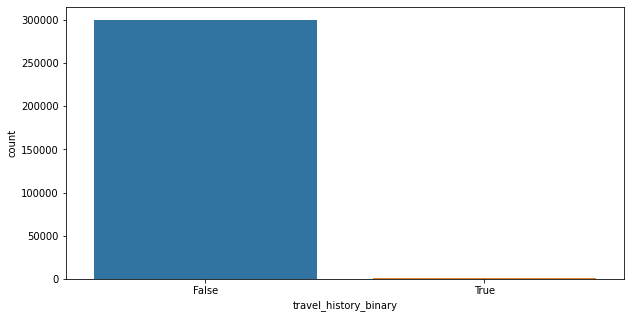

In [650]:
#les personnes avec outcome ="dicharged"
plt.figure(figsize=[10,5])
plt.subplot(111)
sns.countplot(x = 'travel_history_binary', data=dataf[dataf['outcome']==1])

In [651]:
dataf['travel_history_binary'] = dataf['travel_history_binary'].replace(np.nan,False)

In [652]:
np.unique(dataf['travel_history_binary'])

array([False,  True])

# *** la colonne "data_moderator_initials"

In [653]:
np.unique(dataf['data_moderator_initials'].astype(str),return_counts=True)

(array(['NRF, DSC', 'SL', 'TR', 'nan'], dtype=object),
 array([     2,      2, 301130,   5948], dtype=int64))

In [654]:
dataf['data_moderator_initials'] = dataf['data_moderator_initials'].replace(np.nan,TR)

<AxesSubplot:>

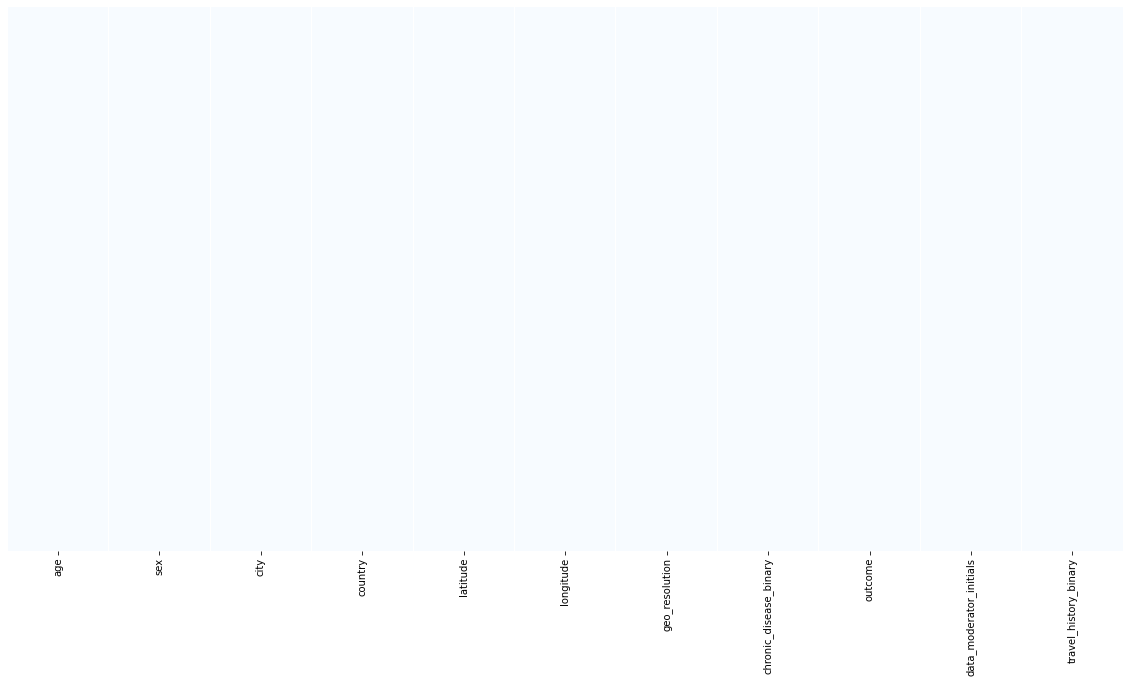

In [656]:
plt.figure(figsize=(20,10))
sns.heatmap(dataf.isnull(), yticklabels =False, cbar = False, cmap="Blues")

In [658]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307082 entries, 0 to 673607
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      307082 non-null  object 
 1   sex                      307082 non-null  object 
 2   city                     307082 non-null  object 
 3   country                  307082 non-null  object 
 4   latitude                 307082 non-null  float64
 5   longitude                307082 non-null  float64
 6   geo_resolution           307082 non-null  object 
 7   chronic_disease_binary   307082 non-null  bool   
 8   outcome                  307082 non-null  int64  
 9   data_moderator_initials  307082 non-null  object 
 10  travel_history_binary    307082 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 24.0+ MB


In [664]:
type(dataf['age'])
dataf["age"] = pd.to_numeric(dataf["age"], downcast="float")

In [ ]:
#transformation des valeurs qualitatives a des valeurs quantitatives

dataf['sex']=dataf['sex'].astype('category').cat.codes
dataf['country']=dataf['country'].astype('category').cat.codes
dataf['city']=dataf['city'].astype('category').cat.codes

In [668]:
dataf['data_moderator_initials']=dataf['data_moderator_initials'].astype('category').cat.codes
dataf['geo_resolution']=dataf['geo_resolution'].astype('category').cat.codes
  

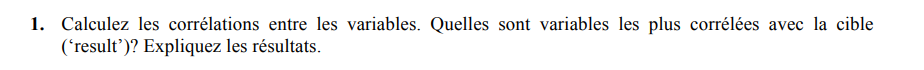

In [669]:
dataf.corr()

,age,sex,city,country,latitude,longitude,geo_resolution,chronic_disease_binary,outcome,data_moderator_initials,travel_history_binary
age,1.000000,-0.168665,-0.056119,0.213621,-0.143332,0.172256,-0.028756,0.102738,-0.570453,-0.258316,0.074784
sex,-0.168665,1.000000,0.093633,-0.223245,0.242236,-0.206724,-0.009459,-0.023852,0.031222,0.247403,-0.045732
city,-0.056119,0.093633,1.000000,0.026398,-0.007611,-0.032437,-0.118206,0.012001,0.003259,-0.014310,-0.001596
country,0.213621,-0.223245,0.026398,1.000000,-0.166477,0.457706,-0.132600,0.073805,-0.126238,-0.725672,0.037365
latitude,-0.143332,0.242236,-0.007611,-0.166477,1.000000,0.011172,-0.357417,-0.011605,0.004778,0.205390,-0.051659
longitude,0.172256,-0.206724,-0.032437,0.457706,0.011172,1.000000,-0.078682,0.076264,-0.064823,-0.372493,0.032531
geo_resolution,-0.028756,-0.009459,-0.118206,-0.132600,-0.357417,-0.078682,1.000000,-0.031357,0.033375,0.221054,-0.021164
chronic_disease_binary,0.102738,-0.023852,0.012001,0.073805,-0.011605,0.076264,-0.031357,1.000000,-0.116523,-0.142996,0.202927
outcome,-0.570453,0.031222,0.003259,-0.126238,0.004778,-0.064823,0.033375,-0.116523,1.000000,0.149691,-0.031429
data_moderator_initials,-0.258316,0.247403,-0.014310,-0.725672,0.205390,-0.372493,0.221054,-0.142996,0.149691,1.000000,-0.182951


<AxesSubplot:>

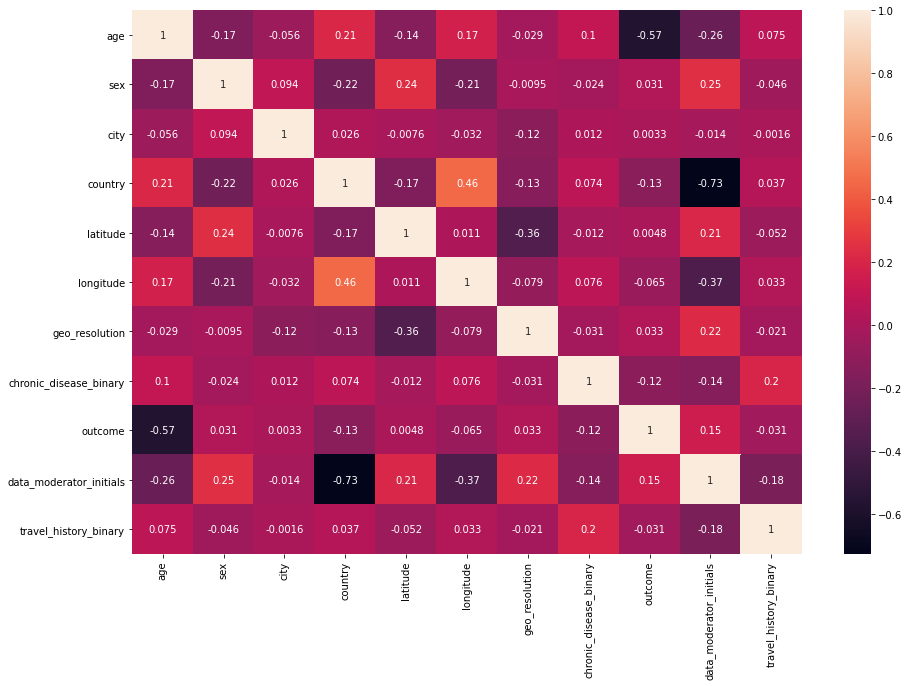

In [670]:
plt.figure(figsize=(15,10)) 
sns.heatmap(dataf.corr(), annot=True)

# NB: les variables les plus correlees avec la cible result sont 'sex', 'city', 'latitude', 'geo_resolution','data_moderator_initials'

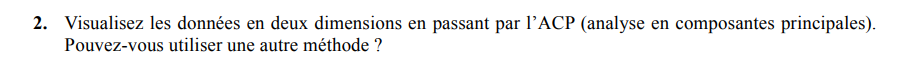

In [671]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307082 entries, 0 to 673607
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      307082 non-null  float32
 1   sex                      307082 non-null  int8   
 2   city                     307082 non-null  int16  
 3   country                  307082 non-null  int8   
 4   latitude                 307082 non-null  float64
 5   longitude                307082 non-null  float64
 6   geo_resolution           307082 non-null  int8   
 7   chronic_disease_binary   307082 non-null  bool   
 8   outcome                  307082 non-null  int64  
 9   data_moderator_initials  307082 non-null  int8   
 10  travel_history_binary    307082 non-null  bool   
dtypes: bool(2), float32(1), float64(2), int16(1), int64(1), int8(4)
memory usage: 12.9 MB


# Notre Base de données Final

In [672]:
dataf.to_csv('final_df.csv')